In [ ]:
# import three pickle files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df319 = pd.read_pickle('paris319.pkl')
df320 = pd.read_pickle('paris320.pkl')
df321 = pd.read_pickle('paris321.pkl')
df332 = pd.read_pickle('paris332.pkl')




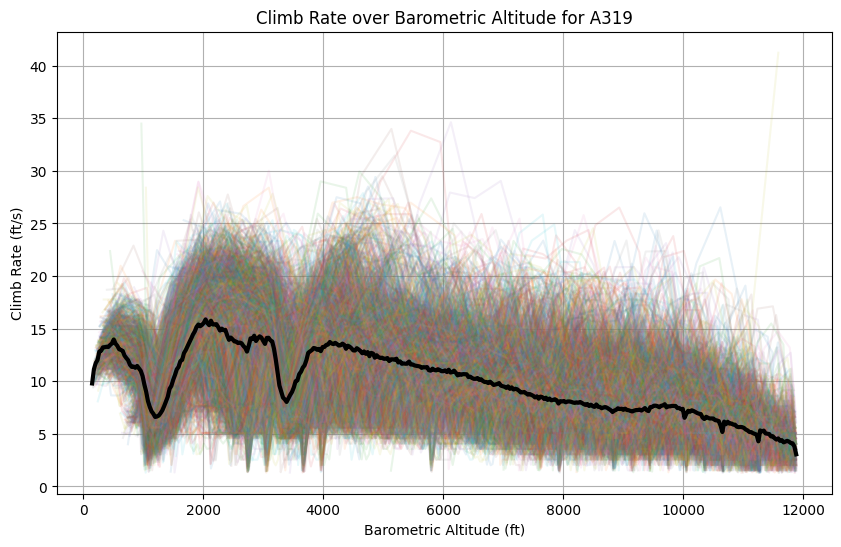

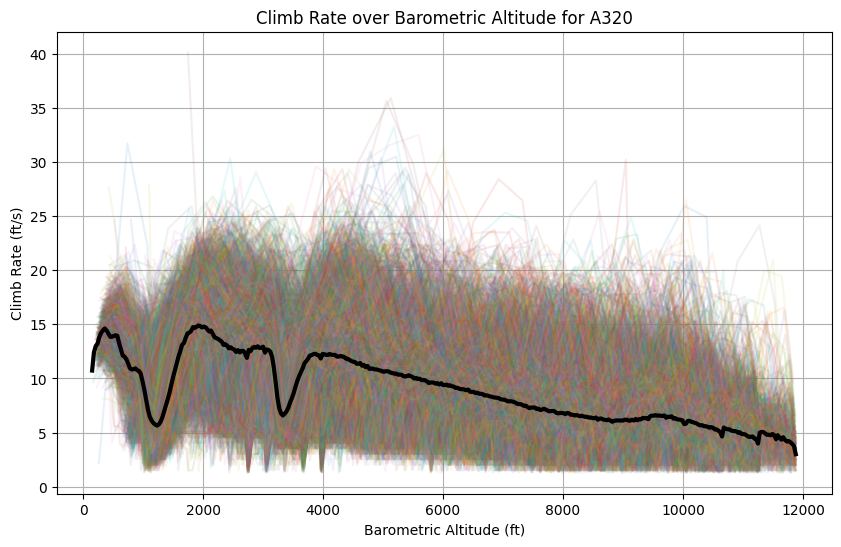

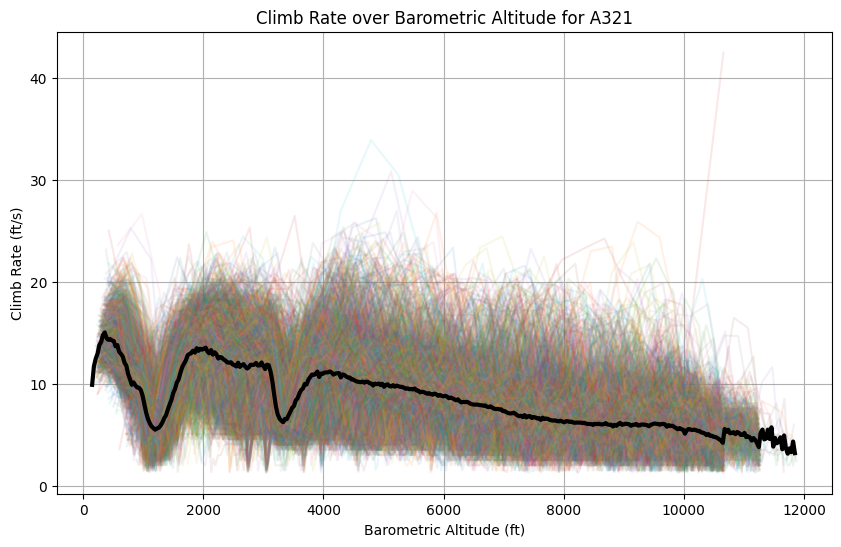

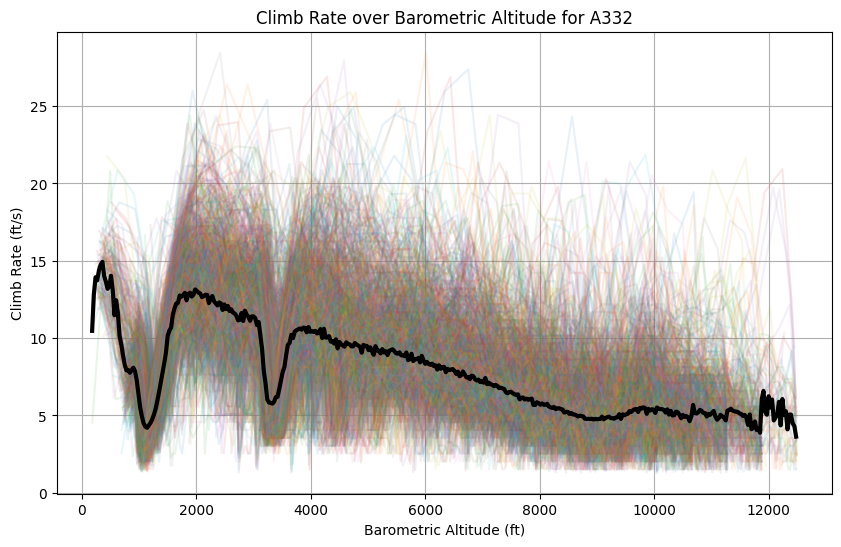

In [ ]:
df319['climb_rate']=df319.groupby('segment')['baroaltitude'].diff() / 15
df320['climb_rate']=df320.groupby('segment')['baroaltitude'].diff() / 15
df321['climb_rate']=df321.groupby('segment')['baroaltitude'].diff() / 15
df332['climb_rate']=df332.groupby('segment')['baroaltitude'].diff() / 15

def plot_climb_rate_vs_baroaltitude(df, name):
    # Plot climb rate over baroaltitude for each flight
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['baroaltitude'], group['climb_rate'], alpha=0.1, label=f'Segment {segment}')
    plt.xlabel('Barometric Altitude (ft)')
    plt.ylabel('Climb Rate (ft/s)')
    # rename title, instead of each flight, include the number behind the df

    plt.title('Climb Rate over Barometric Altitude for ' + name)

    # Calculate the average climb rate for each 100m interval of baroaltitude
    df['baroaltitude_int'] = df['baroaltitude'] // 30 * 30
    df_avg_climb_rate = df.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()

    # Show this average climb rate over baroaltitude as a line graph
    plt.plot(df_avg_climb_rate['baroaltitude_int'], df_avg_climb_rate['climb_rate'], color='black', linestyle='-', linewidth=3, label='Average Climb Rate')

    plt.grid(True)
    plt.show()

# Call the function with the dataframe
plot_climb_rate_vs_baroaltitude(df319, 'A319')
plot_climb_rate_vs_baroaltitude(df320, 'A320')
plot_climb_rate_vs_baroaltitude(df321, 'A321')
plot_climb_rate_vs_baroaltitude(df332, 'A332')



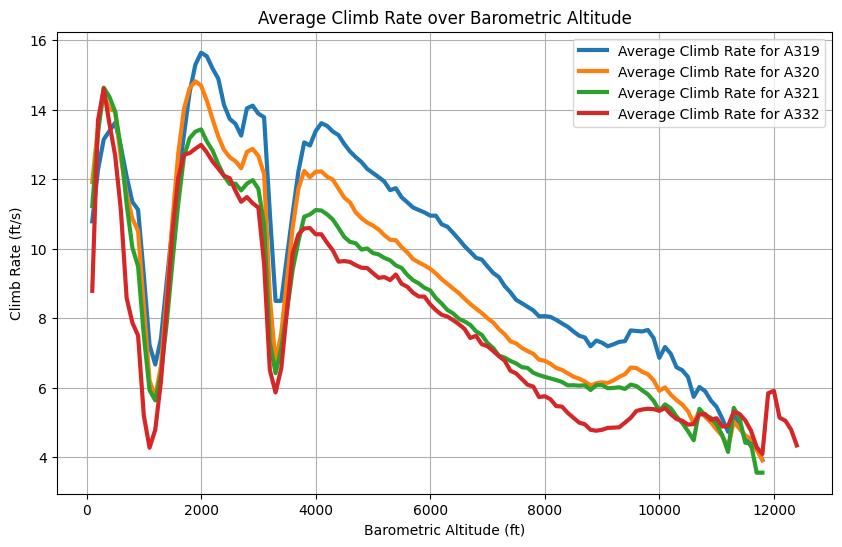

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the average climb rate for each 100m interval of baroaltitude for df319
df319['baroaltitude_int'] = df319['baroaltitude'] // 100 * 100
df319_avg_climb_rate = df319.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df319_avg_climb_rate['baroaltitude_int'], df319_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A319')

# Plot the average climb rate for each 100m interval of baroaltitude for df320
df320['baroaltitude_int'] = df320['baroaltitude'] // 100 * 100
df320_avg_climb_rate = df320.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df320_avg_climb_rate['baroaltitude_int'], df320_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A320')

# Plot the average climb rate for each 100m interval of baroaltitude for df321
df321['baroaltitude_int'] = df321['baroaltitude'] // 100 * 100
df321_avg_climb_rate = df321.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df321_avg_climb_rate['baroaltitude_int'], df321_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A321')

# Plot the average climb rate for each 100m interval of baroaltitude for df332
df332['baroaltitude_int'] = df332['baroaltitude'] // 100 * 100
df332_avg_climb_rate = df332.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df332_avg_climb_rate['baroaltitude_int'], df332_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A332')
plt.xlabel('Barometric Altitude (ft)')
plt.ylabel('Climb Rate (ft/s)')
plt.title('Average Climb Rate over Barometric Altitude')
plt.grid(True)
plt.legend()
plt.show()